**For a 10 dimensional data set. Following experiments were done:**


*   Project the data points onto the top two singular values, then plot the data in this reduced dimensionality space.
*  Is the information lost by reducing to 2-dimension less than 10%? If not, how many singular vectors are required to capture 90% of the information? 



In [0]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive
drive.mount('/content/drive')


In [0]:
data ='LARP_ASS1/Dataset_2_Team_29.csv'


In [0]:
x=pd.read_csv(data)

In [0]:
x.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,sample1,79,86,84,82,89,62,91,94,84,80
1,sample2,81,92,94,67,94,87,73,73,73,101
2,sample3,47,35,49,33,49,59,45,37,45,45
3,sample4,75,74,69,63,74,80,76,86,71,82
4,sample5,18,26,20,21,16,23,26,12,27,27


In [0]:
x=x.iloc[:,1:].values


In [0]:
mean=np.mean(x,axis=0)
m=np.transpose(np.reshape(mean,[10,1]))
m=np.tile(m,(100,1))
std=np.std(x,axis=0)
std=np.transpose(np.reshape(std,[10,1]))
std=np.tile(std,(100,1))


In [0]:
X=x-mean/std
X=np.transpose(X)
Covariance=np.cov(X,bias=True)
eigvals,eigvecs=np.linalg.eigh(Covariance)
eigvecs.shape
eigvals

array([  23.10165011,   29.81476706,   34.1971931 ,   39.72852457,
         53.46475192,   56.74788347,   61.99615758,   73.47698977,
         81.06543414, 8533.50374829])

In [0]:
idx = eigvals.argsort()[::-1]   
eigvals = eigvals[idx]
eigvecs = eigvecs[idx,:]
eigvals
eigvecs.shape

(10, 10)

In [0]:
def projection(X,eigvecs,k):
  temp=eigvecs[:k,:]
  print('eigvec',eigvecs.shape)
  print(temp.shape)
  scalar=temp@X
  return scalar
  
    
  


In [0]:
projected=projection(X,eigvecs,2)
projected=np.transpose(projected)
projected.shape

eigvec (10, 10)
(2, 10)


(100, 2)

In [0]:
k1=eigvecs[0,:2]
k2=eigvecs[1,:2]
k1
origin=[0,0]

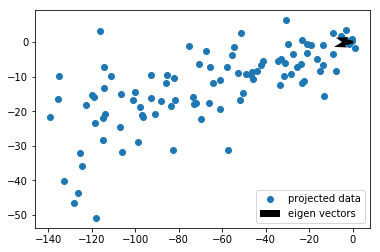

In [0]:
plt.scatter(projected[:,0], projected[:,1],label='projected data')
plt.quiver(*origin,k1,k2,label='eigen vectors')
plt.legend()
plt.show()

In [0]:
scalar1=np.dot(eigvecs[0,:],X)
scalar=np.reshape(scalar,[1,100])
print('scalar',scalar.shape)
vect=np.reshape(eigvecs[0,:],[10,1])
projected=(vect*scalar)
projected.shape
projected=np.transpose(projected)
np.sum(projected)

scalar (1, 100)


8729.179908950966

In [0]:
X.shape

(10, 100)